In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import math
import matplotlib.pyplot as plt

data=pd.read_csv('C:\\Users\\Utsav\\Desktop\\Projects\\Nuclear Property Prediction (EoS)\\case2.csv', sep=',',header=0)
data.head()

,e0,rho0,k0,q0,jo,l0,ksym0,nsmas,rmax,r14,lambda10,lambda14,lambda18,vs,qsym
0,-16.0706,0.1516,254.8354,349.9461,28.6025,65.2548,-121.1590,1.8598,11.2798,13.1123,3669.6474,440.4655,45.9252,0.3432,-38.5060
1,-16.2317,0.1597,269.6421,315.8728,29.2399,63.5371,-139.4079,1.8568,11.0165,12.7531,3231.3450,388.0693,39.6494,0.3804,-32.1537
2,-16.0492,0.1637,205.8924,457.9993,36.0585,90.7699,140.3666,1.9572,11.6259,9.7365,4292.8625,20.2911,77.7613,0.3999,609.3799
3,-15.3761,0.1564,208.1799,400.4285,29.8155,108.6938,136.0138,1.9892,12.0400,14.6182,6689.2120,825.4128,99.0208,0.4130,-50.6029
4,-16.2150,0.1638,200.7626,457.5098,30.8579,90.5731,107.0373,1.9142,11.3747,13.2719,4476.1135,569.6717,61.8284,0.4133,242.9107


In [2]:
X = data.iloc[:,0:7]
X.head()

,e0,rho0,k0,q0,jo,l0,ksym0
0,-16.0706,0.1516,254.8354,349.9461,28.6025,65.2548,-121.1590
1,-16.2317,0.1597,269.6421,315.8728,29.2399,63.5371,-139.4079
2,-16.0492,0.1637,205.8924,457.9993,36.0585,90.7699,140.3666
3,-15.3761,0.1564,208.1799,400.4285,29.8155,108.6938,136.0138
4,-16.2150,0.1638,200.7626,457.5098,30.8579,90.5731,107.0373


In [10]:
y_nsmas = data.iloc[:, 7].values
y_rmax = data.iloc[:,8].values
y_r14 = data.iloc[:,9].values
y_lambda14 = data.iloc[:, 11].values
np.shape(X.values)

(2106, 7)

# Visualization

## Feature Pair Plots

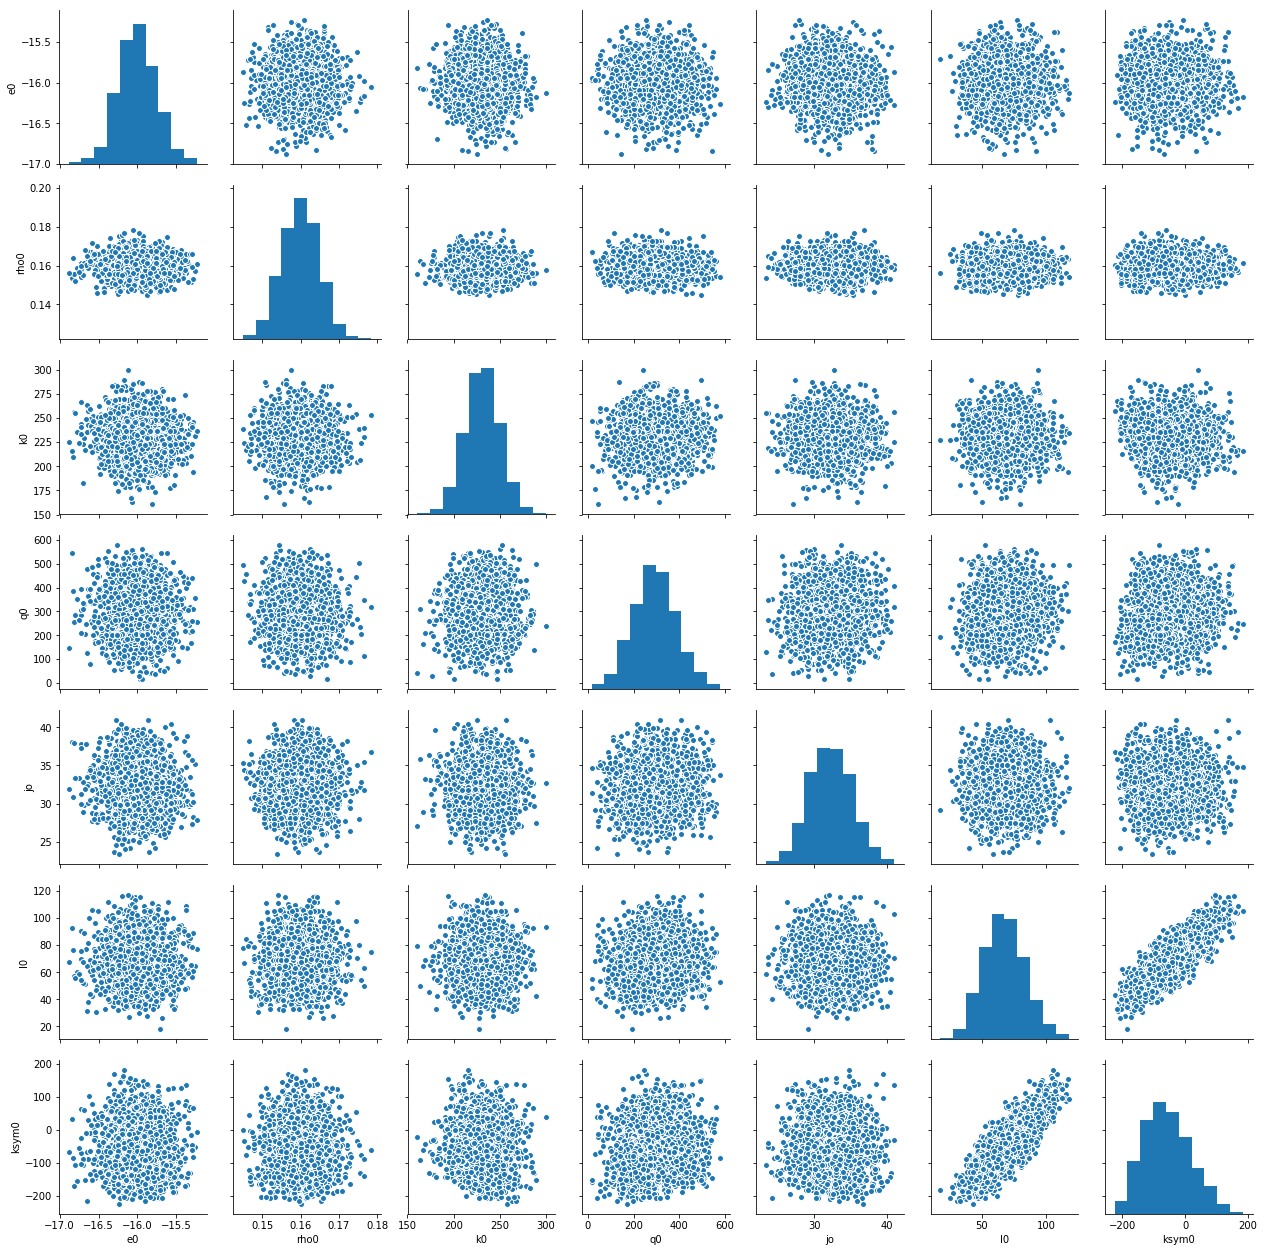

In [4]:
import seaborn as sns
sns.pairplot(X)

In [6]:
def random_forest(y_target):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X.values, y_target, test_size=0.3, random_state=1)
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error
    reg = RandomForestRegressor().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print("RMSE: %s" % (np.sqrt(mean_squared_error(y_test, y_pred))))
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()

# NSMAS

RMSE: 0.14400443415127215


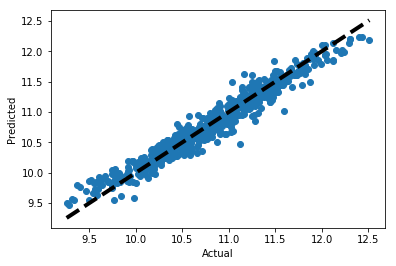

In [7]:
random_forest(y_nsmas)

# RMAX

RMSE: 0.2167126582829953


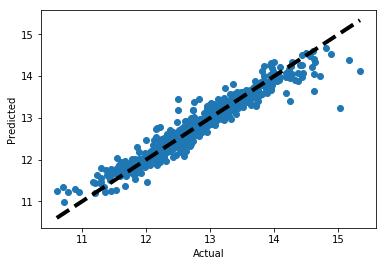

In [8]:
random_forest(y_rmax)

# R14

RMSE: 215.98547433135775


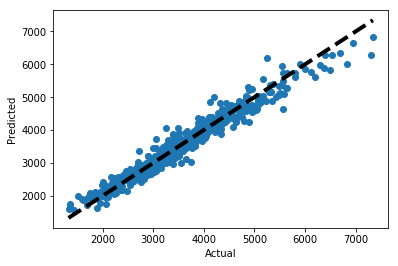

In [9]:
random_forest(y_r14)

# Lambda14

RMSE: 7.416336802130034


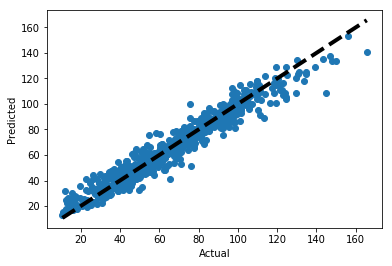

In [11]:
random_forest(y_lambda14)